<a href="https://colab.research.google.com/github/princeKike27/Fashion-ANN-Classifier/blob/main/Fashion_ANN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Classifier

- Using NumPy I’m going to build a Neural Network that classifies fashion articles from the Fashion MNIST dataset. The Fashion MNIST dataset consists of thousands of images of ten different fashion articles. I will create the Neural Network Architecture, perform Forward Propagation, find the Gradients of the Parameters using Backward Propagation, find the Best Parameters  and get the Predictions and Accuracy of the Neural Network.

<br>

- The 10 fashion articles classes are:
  - $0 ⟶ $ *T-shirt / Top* 
  - $1 ⟶ $ *Trouser* 
  - $2 ⟶ $ *Pullover* 
  - $3 ⟶ $ *Dress*
  - $4 ⟶ $ *Coat*  
  - $5 ⟶ $ *Sandal*
  - $6 ⟶ $ *Shirt*
  - $7 ⟶ $ *Sneaker*
  - $8 ⟶ $ *Bag*
  - $9 ⟶ $ *Ankle Boot*     
  





In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading Data from Google Drive

In [ ]:
# connect to google drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# go to Project Dir
%cd '/content/gdrive/My Drive/Data Science/Projects/Portafolio/Fashion Classifier'

# check contents of dir
%ls

/content/gdrive/My Drive/Data Science/Projects/Portafolio/Fashion Classifier
'Fashion ANN-Classifier.ipynb'   fashion-mnist.csv


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Fashion Data

- Each image is $784$ pixels, $28$ pixels $\times$  $28$ pixels

  - Each pixel can take values between $0$ to $255$
    - $0 ⟶$ Completely Black
    - $255 ⟶$ Completely White

In [ ]:
# load data
fashion = pd.read_csv('fashion-mnist.csv', sep=';')

fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# function that returns class name
def class_name(label):

  # list of class names
  classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
             'Sneaker', 'Bag', 'Ankle Boot']

  return classes[label]      


Label: Coat 



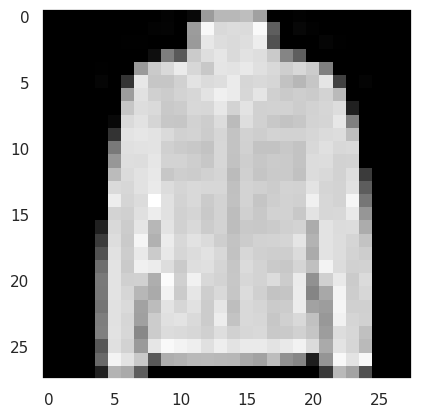

In [ ]:
# choose an image
img = np.array(fashion.iloc[1137, 1:])

# reshape image >> 28 x 28
img = img.reshape(28, 28)

# print label
print(f'Label: {class_name(fashion.iloc[1137, 0])}', '\n')

# display image
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.grid(None)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Train Test Split

- We are going to *Shuffle Randomly* the Dataset and split it in two:

  - Training ⟶ 80% of Data ⟶ 48,000 training examples

  - Test ⟶ 20% of Data ⟶ 12,000 test examples

In [ ]:
# create fasion array
fashion_array = np.array(fashion)

# check shape
print(f'fashion shape: {fashion_array.shape}', '\n')

fashion_array

fashion shape: (60000, 785) 



array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [ ]:
# shuffle randomly 
np.random.shuffle(fashion_array)

fashion_array

array([[0, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# fashion_train array
fashion_train = fashion_array[0:48000, :]

# check shape
print(f'fashion_train shape: {fashion_train.shape}', '\n')

fashion_train

fashion_train shape: (48000, 785) 



array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  0, ...,  0,  0,  0],
       ...,
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ..., 25,  0,  0]])

In [ ]:
# fashion_test array
fashion_test = fashion_array[48000: , :]

# check shape
print(f'fashion_test shape: {fashion_test.shape}', '\n')

fashion_test

fashion_test shape: (12000, 785) 



array([[7, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Inputs

- To be able to feed the Inputs into the Neural Network they need to be Transposed. 
  
  - Each colum in the $X$ array will be an image consisting of $784$ rows (pixels) 
    - $X ⟶ (784 \times m)$

  - We will divide by $255$ so the pixels are in the range of [0, 1]
    - $0 ⟶$ Completely Black
    - $1 ⟶$ Completely White

In [ ]:
# X_train
X_train = fashion_train[:, 1:]

# check shape
print(f'X_train shape: {X_train.shape}', '\n')

X_train

X_train shape: (48000, 784) 



array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 25,  0,  0]])

In [ ]:
# X_train Transpose
X_train_T = X_train.T

# divide by 255 pixels
X_train_T = X_train_T / 255

# check shape
print(f'X_train Transpose shape: {X_train_T.shape}', '\n')

# check first 5 cols
X_train_T[:, 0:5]

X_train Transpose shape: (784, 48000) 



array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# X_test
X_test = fashion_test[:, 1:]

# check shape
print(f'X_test shape: {X_test.shape}', '\n')

X_test

X_test shape: (12000, 784) 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# X_test Transpose
X_test_T = X_test.T

# divide by 255 pixels
X_test_T = X_test_T / 255

# check shape
print(f'X_test Transpose shape: {X_test_T.shape}', '\n')

# check first 5 cols
X_test_T[:, 0:5]

X_test Transpose shape: (784, 12000) 



array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $Y$ Labels

In [ ]:
# Y_train
Y_train = fashion_train[:, 0]

# check shape
print(f'Y_train shape: {Y_train.shape}', '\n')

Y_train

Y_train shape: (48000,) 



array([0, 9, 6, ..., 8, 6, 2])

In [ ]:
# Y_test
Y_test = fashion_test[:, 0]

# check shape
print(f'Y_test shape: {Y_test.shape}', '\n')

Y_test

Y_test shape: (12000,) 



array([7, 1, 6, ..., 5, 2, 0])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### One Hot Encode $Y$

- $Y$ needs to be *One Hot Encoded* so it can be used in the Neural Network

  - If for example $Y ⟶ 2$, the image of a Pullover then:

    - $Y ⟶ [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$ 

In [ ]:
# function to One Hot Encode Y
def one_hot_Y(y):

  # create zeros array of shape >> (len(y), 10)
  one_hot = np.zeros((y.size, 10))
  # for each row >> place a 1 in the col = y
  one_hot[np.arange(y.size), y] = 1

  # transpose array
  one_hot_T = one_hot.T
  return one_hot_T

In [ ]:
# check one_hot_Y
Y_train_T = one_hot_Y(Y_train)

# check shape
print(f'Y_train Encoded shape: {Y_train_T.shape}', '\n')

# check first 5 cols
Y_train_T[:, 0:5]

Y_train Encoded shape: (10, 48000) 



array([[1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# first 5 labels of Y_train
Y_train[:5]

array([0, 9, 6, 0, 6])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Neural Network Model

- Neural Network Model Architecture

  <br>

  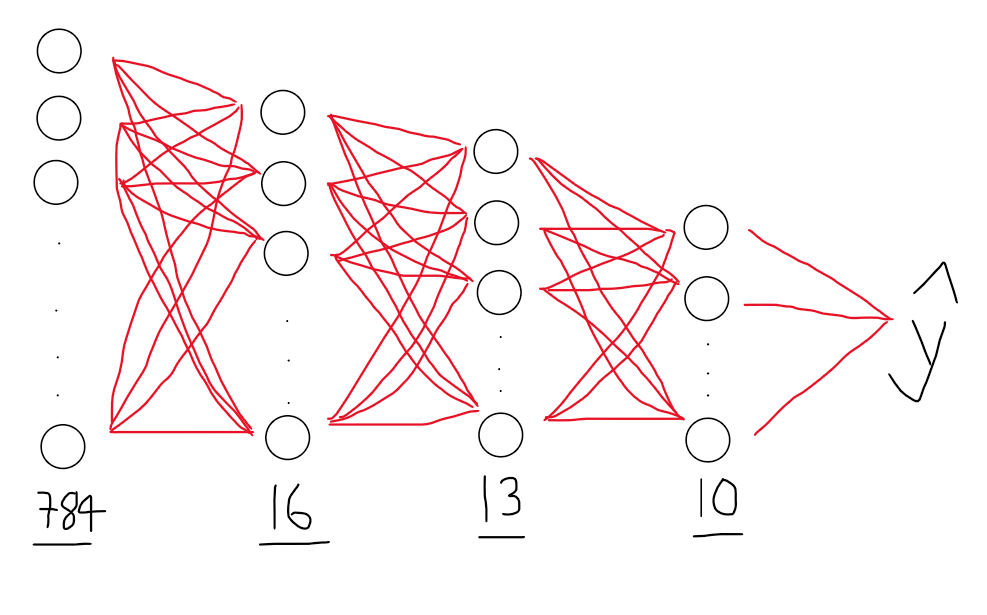

  <br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Forward Propagation

- We Forward Propagate the Neural Network from Left to Right, with Random Values of Parameters $\vec{w}$ and $b$, to get the Model's Predictions $⟶ \hat{y}$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Layer 1

<br>

- $A^{[0]} ⟶ X$ Inputs
  - $X^T ⟶ (784 \times m)$

<br>

- $\vec{w}^{[1]} ⟶$ Initialized with Random Values
  - $\vec{w}^{[1]} ⟶ (16 \times 784)$

<br>

- $b^{[1]} ⟶ $ Inititalized with Random Values
  - $b^{[1]} ⟶ (16 \times 1)$

<br>

$$ Z^{[1]}_{(16 \times m)} = \vec{w}^{[1]}_{(16 \times 784)} \times A^{[0]}_{(784 \times m)} + b^{[1]}_{(16 \times 1)} $$

In [ ]:
# create random state
random_state = np.random.RandomState(123)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[1]}$

In [ ]:
# W_1 
W_1 = random_state.rand(16, 784) - 0.5

# check shape
print(f'W_1 shape: {W_1.shape}', '\n')

# check first 3 cols
W_1[:, 0:3]

W_1 shape: (16, 784) 



array([[ 0.19646919, -0.21386067, -0.27314855],
       [-0.1694179 ,  0.42033043,  0.44758184],
       [-0.02307604,  0.18820677,  0.23814989],
       [ 0.06077213,  0.38303933, -0.25189546],
       [-0.12574471, -0.10640361, -0.17633294],
       [ 0.04727322, -0.40926557,  0.10698605],
       [ 0.45062454,  0.40925658, -0.20311306],
       [-0.05641015, -0.32405026,  0.47146029],
       [ 0.40314159, -0.46044539, -0.07862085],
       [-0.28835156,  0.48939585, -0.04792802],
       [ 0.39963418, -0.37347035,  0.10851662],
       [ 0.11277986,  0.44903347, -0.19769065],
       [ 0.30221908, -0.27023659, -0.33767023],
       [ 0.17476273, -0.29406011,  0.43804368],
       [-0.0322939 ,  0.31851244, -0.02478784],
       [-0.46967793,  0.05565592, -0.21783095]])

<br>

- $b^{[1]}$

In [ ]:
# b_1
b_1 = random_state.rand(16, 1) - 0.5

# check shape
print(f'b_1 shape: {b_1.shape}', '\n')

b_1

b_1 shape: (16, 1) 



array([[-0.09303079],
       [ 0.31453762],
       [ 0.07831151],
       [ 0.03916348],
       [-0.34687879],
       [-0.34928428],
       [-0.42275997],
       [-0.06500196],
       [ 0.00712886],
       [-0.2549949 ],
       [ 0.42120509],
       [-0.39946032],
       [ 0.16229109],
       [ 0.10854361],
       [-0.03993653],
       [ 0.37335169]])


- $Z^{[1]}$

In [ ]:
# Z_1
Z_1 = np.dot(W_1, X_train_T) + b_1

# check shape
print(f'Z_1 shape: {Z_1.shape}', '\n')

# check first 3 cols
Z_1[:, 0:3]

Z_1 shape: (16, 48000) 



array([[ 1.38599162,  0.80339468,  2.869723  ],
       [ 0.77100579,  1.92427129, -3.59282094],
       [ 0.56451137, -2.3822438 ,  1.72687864],
       [-2.25367314, -1.85786147, -1.0543859 ],
       [ 4.34868692, -1.44044857,  3.37912793],
       [-3.32023566, -5.74962309, -2.12356681],
       [-1.89548195, -0.44618959, -3.61451045],
       [ 0.76909327,  4.7953627 ,  2.07401422],
       [-2.1433548 , -0.61711569, -2.91478871],
       [-1.32073503,  0.70826661, -7.57012563],
       [-1.7528293 , -0.63695217, -1.29639326],
       [-1.4560846 ,  2.00947006, -0.53025081],
       [ 1.44704415, -1.29929753, -1.33086001],
       [-1.52351377, -4.4471369 , -8.70670781],
       [ 0.14442765, -0.89329603, -3.87826538],
       [-2.91096589, -1.66333984, -6.12409597]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### ReLU ⟶ Layer 1

- ReLU is going to be used as an Activation Function for Layer 1, else the Nodes will just be a Linear Combination of the Inputs

  - $ReLU(Z) = max(0, Z)$
    - $Z > 0 ⟶ Z$
    - $Z < 0 ⟶ 0$

  <br>

  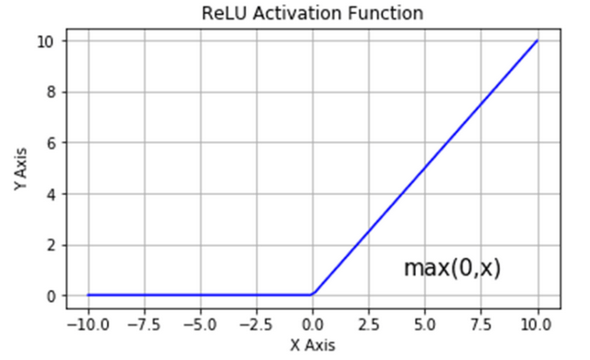
 
  <br> 

In [ ]:
# A_1 >> ReLU(Z_1)
A_1 = np.maximum(0, Z_1)

# check shape
print(f'A_1 shape: {A_1.shape}', '\n')

# check first 3 cols
A_1[:, 0:3]

A_1 shape: (16, 48000) 



array([[1.38599162, 0.80339468, 2.869723  ],
       [0.77100579, 1.92427129, 0.        ],
       [0.56451137, 0.        , 1.72687864],
       [0.        , 0.        , 0.        ],
       [4.34868692, 0.        , 3.37912793],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.76909327, 4.7953627 , 2.07401422],
       [0.        , 0.        , 0.        ],
       [0.        , 0.70826661, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 2.00947006, 0.        ],
       [1.44704415, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.14442765, 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Layer 2

<br>

- $A^{[1]} ⟶$ Inputs of Layer 1
  - $A^{[1]} ⟶ (16 \times m)$

<br>

- $\vec{w}^{[2]} ⟶$ Initialized with Random Values
  - $\vec{w}^{[2]} ⟶ (13 \times 16)$

<br>

- $b^{[2]} ⟶$ Initialized with Random Values
  - $b^{[2]} ⟶ (13 \times 1)$

<br>

$$Z^{[2]}_{(13 \times m)} = \vec{w}^{[2]}_{(13 \times 16)} \times A^{[1]}_{(16 \times m)} + b^{[2]}_{(13 \times 1)}$$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[2]}$

In [ ]:
# W_2
W_2 = random_state.rand(13, 16) - 0.5

# check shape
print(f'W_2 shape: {W_2.shape}', '\n')

# check first 3 cols
W_2[:, 0:3]

W_2 shape: (13, 16) 



array([[ 0.23867291, -0.16174004, -0.23906741],
       [-0.42702538, -0.402369  , -0.42769465],
       [-0.1106569 ,  0.01974565, -0.00650596],
       [-0.14187653,  0.20108   , -0.43726383],
       [-0.27150046, -0.26762052, -0.2071765 ],
       [ 0.02014665, -0.32919022,  0.23651569],
       [-0.3484082 ,  0.38480973, -0.06594504],
       [ 0.06663393, -0.45320608, -0.46399787],
       [-0.026244  , -0.31476351, -0.16887864],
       [ 0.41256662,  0.4436559 , -0.08118094],
       [-0.23375524, -0.02393753,  0.40553761],
       [ 0.19290713, -0.02657503, -0.39092644],
       [ 0.2027967 , -0.15569833, -0.45836332]])

<br>

- $b^{[2]}$

In [ ]:
# b_2
b_2 = random_state.rand(13, 1) - 0.5

# check shape
print(f'b_2 shape: {b_2.shape}', '\n')

b_2

b_2 shape: (13, 1) 



array([[ 0.03666328],
       [-0.20748707],
       [ 0.01022266],
       [ 0.29682803],
       [ 0.38425962],
       [ 0.34423737],
       [ 0.35855229],
       [ 0.35831302],
       [-0.31777633],
       [ 0.14214835],
       [-0.24602471],
       [-0.03906787],
       [ 0.43434437]])

<br>

- $Z^{[2]}$

In [ ]:
# Z_2
Z_2 = np.dot(W_2, A_1) + b_2

# check shape
print(f'Z_2 shape: {Z_2.shape}', '\n')

# check first 3 cols
Z_2[:, 0:3]

Z_2 shape: (13, 48000) 



array([[-2.22062901, -2.05959658, -1.44191709],
       [-0.40279955, -3.24836378, -1.39635366],
       [ 0.55931896, -0.12817093, -0.37560541],
       [ 0.40388635,  3.11731547,  0.12821852],
       [-0.86883738, -0.72832781, -1.7076289 ],
       [ 1.10730583, -2.82051732,  1.32942053],
       [-0.18310274, -1.6974097 , -2.00155935],
       [ 1.75095148,  0.56592436,  1.17168249],
       [-2.23219244, -1.04651406, -2.04664631],
       [ 2.40158635,  3.26149963,  2.38459481],
       [-2.57693373,  0.01426857, -1.97605057],
       [ 1.6445252 ,  1.74755184,  1.53672607],
       [-0.40020564,  1.23616971, -0.06592796]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### ReLU ⟶ Layer 2

In [ ]:
# A_2 >> ReLU(Z_2)
A_2 = np.maximum(0, Z_2)

# check shape
print(f'A_2 shape: {A_2.shape}', '\n')

# check first 3 cols
A_2[:, 0:3]

A_2 shape: (13, 48000) 



array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.55931896, 0.        , 0.        ],
       [0.40388635, 3.11731547, 0.12821852],
       [0.        , 0.        , 0.        ],
       [1.10730583, 0.        , 1.32942053],
       [0.        , 0.        , 0.        ],
       [1.75095148, 0.56592436, 1.17168249],
       [0.        , 0.        , 0.        ],
       [2.40158635, 3.26149963, 2.38459481],
       [0.        , 0.01426857, 0.        ],
       [1.6445252 , 1.74755184, 1.53672607],
       [0.        , 1.23616971, 0.        ]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Layer 3

<br>

- $A^{[2]} ⟶$ Inputs of Layer 2
  - $A^{[2]} ⟶ (13 \times m)$

<br>

- $\vec{w}^{[3]} ⟶$ Initialized with Random Values
  - $\vec{w}^{[3]} ⟶ (10 \times 13)$

<br>

- $b^{[3]} ⟶$ Initialized with Random Values
  - $b^{[3]} \longrightarrow ((10 \times 1)$

<br>

$$ Z^{[3]}_{(10 \times m)} = \vec{w}^{[3]}_{(10 \times 13)} \times A^{[2]}_{(13 \times m)} + b^{[3]}_{(10 \times 1)} $$


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[3]}$

In [ ]:
# W_3
W_3 = random_state.rand(10, 13) - 0.5

# check shape
print(f'W_3 shape: {W_3. shape}', '\n')

# check first 3 cols
W_3[:, 0:3]

W_3 shape: (10, 13) 



array([[ 0.2036276 , -0.09832888, -0.34196219],
       [ 0.07313838,  0.43522546,  0.19174322],
       [-0.40620779,  0.05096667,  0.08842091],
       [ 0.27639738,  0.46093579, -0.37181102],
       [-0.41856959,  0.28166693,  0.13070395],
       [ 0.46918588, -0.43568131,  0.09901643],
       [ 0.20489483, -0.19986005,  0.0725656 ],
       [-0.1562504 ,  0.14206516, -0.12173588],
       [ 0.37780401,  0.26321949,  0.19952164],
       [ 0.11578519,  0.06064349,  0.06192169]])

<br>

- $b^{[3]}$

In [ ]:
# b_3
b_3 = random_state.rand(10, 1) - 0.5

# check shape
print(f'b_3 shape: {b_3.shape}', '\n')

b_3

b_3 shape: (10, 1) 



array([[ 0.2539265 ],
       [ 0.49606473],
       [ 0.17995581],
       [-0.42559422],
       [-0.06057297],
       [ 0.25351695],
       [-0.42052403],
       [-0.42233981],
       [ 0.40911817],
       [-0.40245958]])

<br>

- $Z^{[3]}$

In [ ]:
# Z_3
Z_3 = np.dot(W_3 , A_2) + b_3

# check shape
print(f'Z_3 shape: {Z_3.shape}', '\n')

# check first 3 cols
Z_3[:, 0:3]

Z_3 shape: (10, 48000) 



array([[-0.21792789,  0.91114833,  0.23759061],
       [ 1.096112  ,  0.63126749,  1.25910485],
       [ 1.08021322, -0.65924355,  0.98623718],
       [ 0.92218581,  1.41603384,  0.9955725 ],
       [ 0.48609588,  0.54339249,  0.69784968],
       [ 0.83550146,  2.1266401 ,  0.78366172],
       [-0.10398549,  0.8431946 , -0.35171507],
       [-2.67530489, -2.96769854, -2.56278705],
       [-1.28704044, -3.05544484, -0.8905702 ],
       [-0.31568924,  1.39183926, -0.48628772]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### SoftMax ⟶ Layer 3

- The SoftMax function is used in Multi-Class Classification Problems. It will show us the probability of an image belonging to each of the 10 Classes ⟶ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

  <br>

  - The Predicted Class is the one with the Highest Probability

  <br>

$$SoftMax(Z) = \frac{e^{Z}}{\sum e^{Z}}$$

In [ ]:
# create SoftMax function
def SoftMax(z):
  
  # calculate the probability of an image being classified in each of the 10 classes
  softmax_z = np.exp(z) / np.sum(np.exp(z), axis=0) 
  return softmax_z


In [ ]:
# A_3 >> SoftMax(Z_3)
A_3 = SoftMax(Z_3)

# check shape
print(f'A_3 shape: {A_3.shape}', '\n')

# check first 3 cols
A_3[:, 0:3]

A_3 shape: (10, 48000) 



array([[0.0530317 , 0.09731433, 0.07836723],
       [0.1973403 , 0.07355735, 0.21765693],
       [0.19422764, 0.02023785, 0.16567904],
       [0.16583668, 0.16122997, 0.16723295],
       [0.1072233 , 0.06736937, 0.12417165],
       [0.15206668, 0.32813924, 0.13529762],
       [0.05943196, 0.09092114, 0.04347127],
       [0.00454266, 0.00201194, 0.00476372],
       [0.01820647, 0.00184292, 0.02536182],
       [0.0480926 , 0.15737589, 0.03799777]])

In [ ]:
# the sum of each colum == 1
np.sum(A_3[:, 0:5], axis=0)

array([1., 1., 1., 1., 1.])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Forward Prop Function

In [ ]:
# function to caculate Forward Prop
def forward_prop(x, w1, b1, w2, b2, w3, b3):

  # Layer 1
  z1 = np.dot(w1, x) + b1
  a1 = np.maximum(0, z1) # ReLU

  # Layer 2
  z2 = np.dot(w2, a1) + b2
  a2 = np.maximum(0, z2) # ReLU

  # Layer 3
  z3 = np.dot(w3, a2) + b3
  a3 = SoftMax(z3)

  return z1, a1, z2, a2, z3, a3

In [ ]:
# test forward_prop
z1, a1, z2, a2, z3, a3 = forward_prop(X_train_T, W_1, b_1, W_2, b_2, W_3, b_3)

# check shape of a3
print(f'a3 shape: {a3.shape}', '\n')

# check first 3 cols
a3[:, 0:3]

a3 shape: (10, 48000) 



array([[0.0530317 , 0.09731433, 0.07836723],
       [0.1973403 , 0.07355735, 0.21765693],
       [0.19422764, 0.02023785, 0.16567904],
       [0.16583668, 0.16122997, 0.16723295],
       [0.1072233 , 0.06736937, 0.12417165],
       [0.15206668, 0.32813924, 0.13529762],
       [0.05943196, 0.09092114, 0.04347127],
       [0.00454266, 0.00201194, 0.00476372],
       [0.01820647, 0.00184292, 0.02536182],
       [0.0480926 , 0.15737589, 0.03799777]])

In [ ]:
# predictions >> highest probability per col
predictions = np.argmax(a3, axis=0)

print(f'Predictions: {predictions}')
print(f'Labels:      {Y_train}')

Predictions: [1 5 1 ... 4 2 5]
Labels:      [0 9 6 ... 8 6 2]


- Above we can see the Predictions of the Model after activating the Neurons from Left to Right, with Random Values of Parameters $\vec{w}$ and $b$ 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Categorical Cross Entropy Loss

- Given a set of SoftMax Probabilities $S$ and their Labels $T$ the Cross Entropy Loss is:

  <br>

  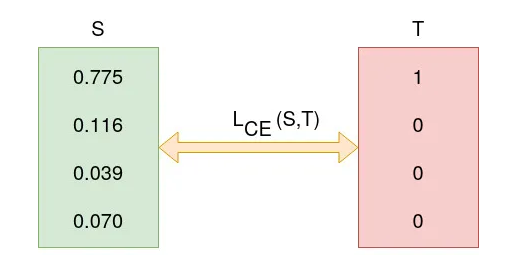

  <br>

  $$ L_{CE} = - \frac{1}{m} \sum_{i=1}^{m}  \sum_{j=1}^{k}  T_{i, j} \log(S_{i, j})$$

  <br>

    - $m ⟶$ Number of Samples
    - $k ⟶$ Number of Clasess
    - $T_{i, j} ⟶ 1$ if sample $i$ is in class $k$ else $0$
    - $S_{i, j} ⟶ $ Probability of sample $i$ being in class $k$

  <br>

  $$ L_{CE} = -[1 \log(0.775) + 0 \log(0.116) + 0 \log(0.039) + 0 log(0.07)] $$
  <br>
  $$ L_{CE} = - \log(0.775) $$





In [ ]:
# cross entropy loss function
def cross_entropy_loss(a3, y):
  
  # set m
  m = a3.shape[1]

  # compute cross entropy loss
  loss_ce = - 1/m * np.sum(one_hot_Y(y) * np.log(a3))
  return loss_ce


In [ ]:
# test function
loss_ce = cross_entropy_loss(A_3, Y_train)

print(f'Cross Entropy Loss with Random Values of w and b: {loss_ce:.4f}')

Cross Entropy Loss with Random Values of w and b: 2.4119


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



### Backward Propagation

- We Back Propagate the Neural Network from Right to Left to find the Gradients of Parameters $\vec{w}$ and $b$ 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Gradients of Layer 3

<br>

- $\partial{Z^{[3]}} \longrightarrow$ How much were the Outputs off from the Labels
  - $\partial{Z^{[3]}} ⟶ A^{[3]} - Y_{hot}$
  - $\partial{Z^{[3]}} ⟶ (10 \times m)$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}^{[3]}$
  - $\vec{w}^{[3]}_{(10 \times 13)} = \frac{1}{m} \times \partial{Z^{[3]}}_{(10 \times m)} \times A^{[2]}.T_{(m \times 13)}$

<br>

- Partial Derivative of $J$ with respect to $b^{[3]}$
  - $\partial{b}^{[3]}_{(10 \times 1)} = \frac{1}{m} \sum \partial{Z^{[3]}}_{(10 \times m)}$

In [ ]:
# store m
m = X_train_T.shape[1]

print(f'm: {m}')

m: 48000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



<br>

- $\partial{Z^{[3]}}$

In [ ]:
# partial dev of Z_3
d_Z3 = A_3 - one_hot_Y(Y_train)

# check shape
print(f'd_Z3 shape: {d_Z3.shape}', '\n')

# check first 3 cols
d_Z3[:, 0:3]

d_Z3 shape: (10, 48000) 



array([[-0.9469683 ,  0.09731433,  0.07836723],
       [ 0.1973403 ,  0.07355735,  0.21765693],
       [ 0.19422764,  0.02023785,  0.16567904],
       [ 0.16583668,  0.16122997,  0.16723295],
       [ 0.1072233 ,  0.06736937,  0.12417165],
       [ 0.15206668,  0.32813924,  0.13529762],
       [ 0.05943196,  0.09092114, -0.95652873],
       [ 0.00454266,  0.00201194,  0.00476372],
       [ 0.01820647,  0.00184292,  0.02536182],
       [ 0.0480926 , -0.84262411,  0.03799777]])

<br>

- $\partial{\vec{w}^{[2]}}$

In [ ]:
# partial dev of W_3
d_W3 = 1/m * np.dot(d_Z3, A_2.T)

# check shape
print(f'd_W3 shape: {d_W3.shape}', '\n')

# check first 3 cols
d_W3[:, 0:3]

d_W3 shape: (10, 13) 



array([[ 3.72965823e-03, -1.41303572e-02, -2.36834373e-02],
       [ 1.16539613e-02, -5.26626021e-03,  8.22949396e-02],
       [-1.60046968e-02,  3.17853156e-02,  2.33241083e-02],
       [ 1.15158013e-02,  1.59168720e-03,  2.65181805e-02],
       [-2.68851791e-03, -2.15779053e-02,  1.37789464e-02],
       [ 2.83189159e-03,  6.00725491e-03,  2.75661130e-02],
       [ 3.35861888e-04,  5.97481516e-05,  4.97065466e-04],
       [-3.66522789e-03, -9.30763385e-03, -6.70385002e-03],
       [-1.13535858e-02,  6.02850741e-03, -1.11053930e-01],
       [ 3.64485400e-03,  4.80964323e-03, -3.25381354e-02]])

<br>

- $\partial{b^{[3]}}$

In [ ]:
# partial dev of b_3
d_b3 = 1/m * np.sum(d_Z3, axis=1) # sum row-wise
# reshape to (10, 1)
d_b3 = d_b3.reshape(10, 1)

# check shape
print(f'd_b3 shape: {d_b3.shape}', '\n')

d_b3

d_b3 shape: (10, 1) 



array([[-0.04019154],
       [ 0.06559822],
       [ 0.03405575],
       [ 0.0647071 ],
       [-0.00523234],
       [ 0.03719013],
       [-0.00560681],
       [-0.08143246],
       [-0.03562182],
       [-0.03346621]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Gradients of Layer 2

<br>

- $\partial{Z^{[2]}} ⟶ $ Weights of Layer 3 $\times$ Error of Layer 3 $\times$ the Derivative of the Activation Function of Layer 2

  - $\partial{Z^{[2]}}_{(13 \times m)} =  \vec{w}^{[3]}.T_{(13 \times 10)} \times \partial{Z^{[3]}}_{(10 \times m)} \times \partial{ReLU(Z^{[2]})}_{(13 \times m)}$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}^{[2]}$

  - $\partial{\vec{w}^{[2]}}_{(13 \times 16)} = \frac{1}{m} \times \partial{Z^{[2]}}_{(13 \times m)} \times A^{[1]}.T_{(m \times 16)}$

<br>

- Partial Derivative of $J$ with respect to $b^{[2]}$

  - $\partial{b^{[2]}}_{(13 \times 1)} = \frac{1}{m} \sum \partial{Z^{[2]}}_{(13 \times m)}$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



<br>

- $\partial{ReLU(Z)}$

  - $0 ⟶ $ if $Z < 0$
  - $1 ⟶ $ if $Z > 0$

In [ ]:
# function to calculate derivative of ReLU
def deriv_ReLU(z):
  return z > 0
  

In [ ]:
# test function
deriv_ReLU(Z_2) * 1 

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



<br>

- $\partial{Z^{[2]}}$

In [ ]:
# partial dev of Z_2
d_Z2 = np.dot(W_3.T, d_Z3) * deriv_ReLU(Z_2)

# check shape
print(f'd_Z2 shape: {d_Z2.shape}', '\n')

# check first 3 cols
d_Z2[:, 0:3]

d_Z2 shape: (13, 48000) 



array([[-0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        ],
       [ 0.35662178, -0.        , -0.        ],
       [-0.26091126, -0.28395778, -0.43447716],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04009437,  0.        ,  0.06525285],
       [ 0.        , -0.        ,  0.        ],
       [ 0.42884065, -0.14539436, -0.24627418],
       [-0.        ,  0.        , -0.        ],
       [-0.01176868,  0.00167538,  0.49292455],
       [-0.        , -0.54170638,  0.        ],
       [ 0.19476213,  0.42708155, -0.21351894],
       [ 0.        , -0.14234478, -0.        ]])

<br>

- $\partial{\vec{w}^{[2]}}$

In [ ]:
# partial dev of W_2
d_W2 = 1/m * np.dot(d_Z2, A_1.T)

# check shape
print(f'd_W2 shape: {d_W2.shape}', '\n')

# check first 3 cols
d_W2[:, 0:3]

d_W2 shape: (13, 16) 



array([[ 0.05525343, -0.00037898,  0.02243518],
       [ 0.00336046, -0.00949708, -0.01681852],
       [-0.03075508,  0.02201916,  0.00448084],
       [ 0.00033374, -0.01430079, -0.00237273],
       [-0.0013256 , -0.00065657, -0.00056056],
       [-0.01879888,  0.0066677 , -0.0131725 ],
       [ 0.01953506,  0.00435598,  0.00143878],
       [ 0.05078452, -0.01389918,  0.01574339],
       [ 0.01709789, -0.00144582, -0.00062531],
       [ 0.20052967,  0.03160236, -0.0113879 ],
       [-0.00846972, -0.01201776,  0.00576323],
       [ 0.10333167,  0.0191012 , -0.00274954],
       [ 0.06330291, -0.00071767, -0.0044268 ]])

<br>

- $\partial{b^{[2]}}$

In [ ]:
# partial dev of b_2
d_b2 = 1/m * np.sum(d_Z2, axis=1) # sum row-wise
# reshape to (13, 1)
d_b2 = d_b2.reshape(13, 1)

# check shape
print(f'd_b2 shape: {d_b2.shape}', '\n')

d_b2

d_b2 shape: (13, 1) 



array([[ 0.01829057],
       [-0.0054564 ],
       [ 0.00232671],
       [-0.02226381],
       [-0.00200952],
       [ 0.01062895],
       [ 0.01912862],
       [ 0.03805019],
       [-0.00047159],
       [ 0.05101539],
       [-0.0062635 ],
       [ 0.05188115],
       [ 0.01040889]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Gradients of Layer 1

<br>

- $\partial{Z^{[1]}} ⟶ $ Weight of Layer 2 $\times$ Error of Layer 2 $\times$ Derivative of Activation Function of Layer 1

  - $\partial{Z^{[1]}}_{(16 \times m)} = \vec{w}^{[2]}.T_{(16 \times 13)} \times \partial{Z^{[2]}}_{(13 \times m)} \times \partial{ReLU(Z^{[1]}})_{(16 \times m)}$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}^{[1]}$

  - $\partial{\vec{w}^{[1]}}_{(16 \times 784)} = \frac{1}{m} \times \partial{Z^{[1]}}_{(16 \times m)} \times A^{[0]}.T_{(m \times 784)}$

<br>

- Partial Derivative of $J$ with respect to $b^{[1]}$

  - $\partial{b^{[1]}}_{(16 \times 1)} = \frac{1}{m} \sum \partial{Z^{[1]}}_{(16 \times m)}$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



<br>

- $\partial{Z^{[1]}}$

In [ ]:
# partial dev of Z_1
d_Z1 = np.dot(W_2.T, d_Z2) * deriv_ReLU(Z_1)

# check shape
print(f'd_Z1 shape: {d_Z1.shape}', '\n')

# check first 3 cols
d_Z1[:, 0:3]

d_Z1 shape: (16, 48000) 



array([[ 0.05803773,  0.21143668,  0.20872142],
       [-0.23697388,  0.03331892,  0.        ],
       [-0.17187948, -0.        ,  0.36313928],
       [-0.        , -0.        , -0.        ],
       [ 0.23639518,  0.        , -0.11335892],
       [-0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.08308979, -0.07413897, -0.06600228],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.02629723, -0.        ],
       [-0.        ,  0.        , -0.        ],
       [ 0.        , -0.10701756, -0.        ],
       [ 0.22290297, -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.3568372 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        ]])

<br>

- $\partial{\vec{w}^{[1]}}$

In [ ]:
# partial dev of W_1
d_W1 = 1/m * np.dot(d_Z1, X_train_T.T)

# check shape
print(f'd_W1 shape: {d_W1.shape}', '\n')

# check first 3 cols
d_W1[:, 0:3]

d_W1 shape: (16, 784) 



array([[ 4.41444676e-07,  4.62144853e-06,  2.09267339e-05],
       [-2.15322434e-08, -1.61456520e-07, -1.92297658e-07],
       [ 4.38767120e-07, -2.17643492e-06, -1.46746741e-05],
       [ 1.43830275e-07, -3.05305656e-06, -1.29675638e-05],
       [-6.57659228e-08,  2.69971888e-06,  1.71678582e-05],
       [ 0.00000000e+00,  1.21275892e-08,  1.88353476e-07],
       [ 4.23877031e-07,  1.02612971e-06,  4.60345456e-06],
       [ 3.79030720e-07,  2.97757883e-06,  1.46951372e-05],
       [-4.81683152e-07, -2.30880437e-06, -9.61613486e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.41697338e-07, -6.59546453e-07,  7.22434606e-07],
       [ 1.74044276e-08,  2.63602437e-06,  1.08635374e-05],
       [ 8.64843895e-08,  1.15189098e-06,  1.11094251e-05],
       [ 0.00000000e+00,  0.00000000e+00,  1.32476267e-09],
       [ 2.38403549e-08,  9.32443558e-07,  5.41314864e-06],
       [ 0.00000000e+00,  1.45905194e-07,  1.17686582e-07]])

<br>

- $\partial{b^{[1]}}$

In [ ]:
# partial dev of b_1
d_b1 = 1/m * np.sum(d_Z1, axis=1) # sum row-wise
# reshape to (16, 1)
d_b1 = d_b1.reshape(16, 1)

# check shape
print(f'd_b1 shape: {d_b1.shape}', '\n')

d_b1

d_b1 shape: (16, 1) 



array([[ 0.03286693],
       [ 0.00559806],
       [-0.00166801],
       [-0.00562428],
       [ 0.01408304],
       [-0.00011642],
       [-0.0027098 ],
       [ 0.02020715],
       [ 0.00955806],
       [ 0.00446729],
       [ 0.01293625],
       [ 0.00294664],
       [ 0.01590083],
       [ 0.00070286],
       [-0.00093175],
       [ 0.00232497]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Backward Prop Function

In [ ]:
# function to calculate back propagation
def back_prop(x, y, a3, a2, a1, z2, z1, w3, w2):
  # store m
  m = x.shape[1]

  # Gradients of Layer 3
  dz3 = a3 - one_hot_Y(y)
  dw3 = 1/m * np.dot(dz3, a2.T)
  db3 = 1/m * np.sum(dz3, axis=1)
  # reshape to (10, 1)
  db3 = db3.reshape(10, 1)

  # Gradients of Layer 2
  dz2 = np.dot(w3.T, dz3) * deriv_ReLU(z2)
  dw2 = 1/m * np.dot(dz2, a1.T)
  db2 = 1/m * np.sum(dz2, axis=1)
  # reshape to (13, 1)
  db2 = db2.reshape(13, 1)

  # Gradients of Layer 1
  dz1 = np.dot(w2.T, dz2) * deriv_ReLU(z1)
  dw1 = 1/m * np.dot(dz1, x.T)
  db1 = 1/m * np.sum(dz1, axis=1)
  # reshape to (16, 1)
  db1 = db1.reshape(16, 1)

  return dz3, dw3, db3, dz2, dw2, db2, dz1, dw1, db1



In [ ]:
# test function
dz3, dw3, db3, dz2, dw2, db2, dz1, dw1, db1 = back_prop(X_train_T, Y_train, A_3, A_2, A_1,
                                                        Z_2, Z_1, W_3, W_2)

# check shape of dz1
print(f'dz1 shape: {dz1.shape}', '\n')

# check first 3 cols
dz1[:, 0:3]

dz1 shape: (16, 48000) 



array([[ 0.05803773,  0.21143668,  0.20872142],
       [-0.23697388,  0.03331892,  0.        ],
       [-0.17187948, -0.        ,  0.36313928],
       [-0.        , -0.        , -0.        ],
       [ 0.23639518,  0.        , -0.11335892],
       [-0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.08308979, -0.07413897, -0.06600228],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.02629723, -0.        ],
       [-0.        ,  0.        , -0.        ],
       [ 0.        , -0.10701756, -0.        ],
       [ 0.22290297, -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.3568372 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        ]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Gradient Descent

- We ran Gradient Descent to find the Best Parameters $\vec{w}$ and $b$ that Minimize Cost $J$

  - We Update Parametes until Convergence:

  <br>

  $$\vec{w}^{[3]} = \vec{w}^{[3]} - \alpha \times \partial{w}^{[3]}$$
  <br>
  $$ b^{[3]} = b^{[3]} - \alpha \times \partial{b}^{[3]}$$
  <br>
  $$\vec{w}^{[2]} = \vec{w}^{[2]} - \alpha \times \partial{w}^{[2]}$$
  <br>
  $$ b^{[2]} = b^{[2]} - \alpha \times \partial{b}^{[2]}$$
  <br>
  $$\vec{w}^{[1]} = \vec{w}^{[1]} - \alpha \times \partial{w}^{[1]}$$
  <br>
  $$ b^{[1]} = b^{[1]} - \alpha \times \partial{b}^{[1]}$$
  <br>

In [ ]:
# function to run gradient descent
def gradient_descent(x, y, w1, b1, w2, b2, w3, b3, epochs, learning_rate):

  '''Run Gradient Descent to find Best Parameters of W an b
     that Minimize Cost J'''


  # array to store losses
  losses = np.zeros(epochs)
  # array to store accuracies
  accuracies = np.zeros(epochs)


  for epoch in range(epochs):
    # Forward Prop
    z1, a1, z2, a2, z3, a3 = forward_prop(x, w1, b1, w2, b2, w3, b3)

    # Loss at ith epoch
    loss = cross_entropy_loss(a3, y)
    # store loss
    losses[epoch] = loss

    # Back Propagation
    dz3, dw3, db3, dz2, dw2, db2, dz1, dw1, db1 = back_prop(x, y, a3, a2, a1, z2, z1,
                                                            w3, w2)
    
    # Update Params
    w3 = w3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

    # predictions at ith epoch
    predictions = np.argmax(a3, axis=0)
    # accuracy at ith epoch
    accuracy = np.sum(predictions == y) / len(y)
    # store accuracy
    accuracies[epoch] = accuracy

    # every 10th epoch
    if epoch % 10 == 0:
      print(f'Epoch: {epoch}, Predictions: {predictions}, Labels: {y}, Accuracy: {accuracy:.4f}')

  return w3, b3, w2, b2, w1, b1, losses, accuracies

In [ ]:
# set epochs and learning rate
epochs = 500
alpha = 0.3 

# test function
w3, b3, w2, b2, w1, b1, losses_i, accuracies_i = gradient_descent(X_train_T, Y_train, W_1, b_1, 
                                                                  W_2, b_2, W_3, b_3, epochs, alpha)



Epoch: 0, Predictions: [1 5 1 ... 4 2 5], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.1974
Epoch: 10, Predictions: [3 9 3 ... 4 2 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.4047
Epoch: 20, Predictions: [1 9 0 ... 4 2 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.5646
Epoch: 30, Predictions: [3 9 0 ... 8 2 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6162
Epoch: 40, Predictions: [3 9 0 ... 8 2 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6446
Epoch: 50, Predictions: [3 9 0 ... 8 4 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6453
Epoch: 60, Predictions: [0 9 0 ... 8 4 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6528
Epoch: 70, Predictions: [0 9 0 ... 8 2 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6898
Epoch: 80, Predictions: [3 9 0 ... 8 4 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6760
Epoch: 90, Predictions: [3 9 0 ... 8 4 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.6969
Epoch: 100, Predictions: [3 9 0 ... 8 4 6], Labels: [0 9 6 ... 8 6 2], Accuracy: 0.7078
Epoch: 110, Predictions: [3 9 0 ... 8 4 6],

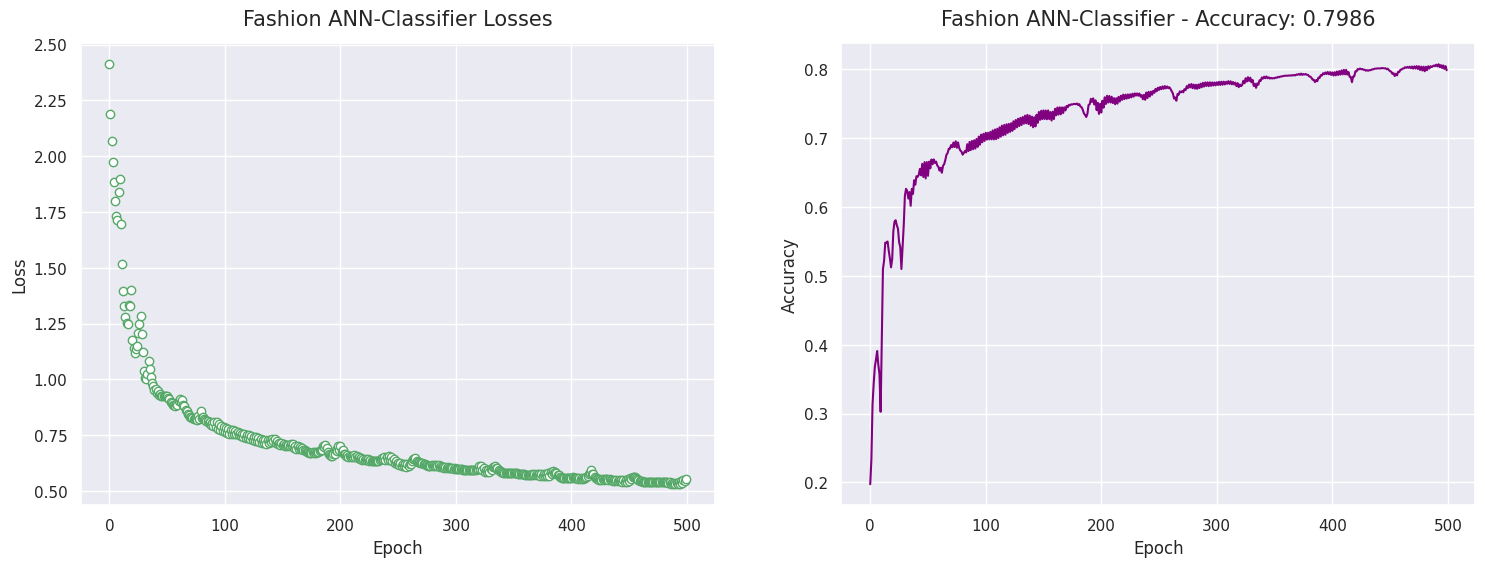

In [ ]:
# plot losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Loss
ax1.plot(losses_i, 'go', markerfacecolor='w', lw=0.1)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Fashion ANN-Classifier Losses', pad=13, size=15)

# Accuracy
ax2.plot(accuracies_i, color='purple')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title(f'Fashion ANN-Classifier - Accuracy: {accuracies_i[-1]:.4f}', pad=13, size=15)


plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Parametric Experiments

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Learning Rates

- A Parametric Experiment is going to be run to find the Learning Rate with the highest average accuracy, with a fixed number of epochs

In [ ]:
# array of learning rates
learning_rates = np.linspace(0.09, 0.3, 3)

learning_rates

array([0.09 , 0.195, 0.3  ])

In [ ]:
# function to run experimental gradient descent
def gradient_descent_explr(x, y, w1, b1, w2, b2, w3, b3, epochs, learning_rate):

  for epoch in range(epochs):
    # Forward Prop
    z1, a1, z2, a2, z3, a3 = forward_prop(x, w1, b1, w2, b2, w3, b3)
    # Back Prop
    dz3, dw3, db3, dz2, dw2, db2, dz1, dw1, db1 = back_prop(x, y, a3, a2, a1, z2, z1, w3, w2)
    # Update Params
    w3 = w3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

  # predictions
  final_predict = np.argmax(a3, axis=0)
  # store final accuracy
  final_accuracy = np.sum(final_predict == y) / len(y)

  return final_accuracy

In [ ]:
# number of experiments
num_exp_lr = 2

# array to store accuracies per learning rate
accuracies_lr = np.zeros((len(learning_rates), num_exp_lr))

# run learning rate experiment
for idx_e in range(num_exp_lr):

  for idx_lr, alpha in enumerate(learning_rates):
    # run gradient descent with ith learning rate
    accuracy_i = gradient_descent_explr(X_train_T, Y_train, W_1, b_1, W_2, b_2, W_3, b_3,
                                        epochs, alpha)
    # store accuracy for ith learning rate
    accuracies_lr[idx_lr, idx_e] = accuracy_i

In [ ]:
# mean accuracy per learning rate
mean_accuracies_lr = np.mean(accuracies_lr, axis=1)

mean_accuracies_lr

array([0.76470833, 0.7946875 , 0.7985625 ])

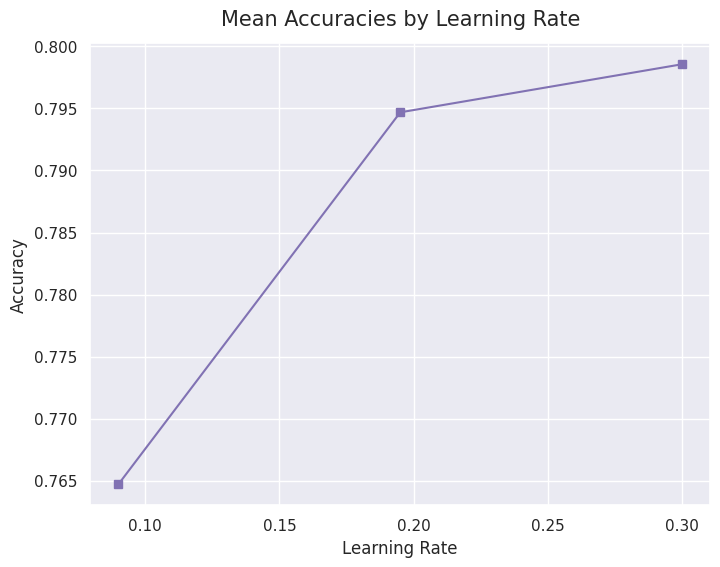

In [ ]:
# plot accuracies
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(learning_rates, mean_accuracies_lr, 'ms-')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.title('Mean Accuracies by Learning Rate', pad=13, size=15)

plt.show()

- As the plot above shows, after running the Parametric experiment on the Learning Rate, a Learning Rate of 0.3 has the highest average accuracy when Training the Model

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Predictions on Test Data



In [ ]:
# Parameters that Minimize Cost

# w1
print(f'w1 shape: {w1.shape}')
print(w1[:, 0:3], '\n')
# b1
print(f'b1 shape: {b1.shape}')
print(b1[:4], '\n')

# w2
print(f'w2 shape: {w2.shape}')
print(w2[:, 0:3], '\n')
# b2
print(f'b2 shape: {b2.shape}')
print(b2[:4], '\n')

# w3
print(f'w3 shape: {w3.shape}')
print(w3[:, 0:3], '\n')
# b3
print(f'b3 shape: {b3.shape}')
print(b3[:4], '\n')

w1 shape: (16, 784)
[[ 0.19646934 -0.21389864 -0.27195015]
 [-0.16943156  0.42031713  0.44756912]
 [-0.02307572  0.18819889  0.23777761]
 [ 0.06078415  0.38304436 -0.25327543]
 [-0.12570832 -0.10640808 -0.17660384]
 [ 0.04728657 -0.40925811  0.10698785]
 [ 0.45061349  0.4091914  -0.20385711]
 [-0.05641344 -0.3239557   0.47195341]
 [ 0.40315979 -0.46042506 -0.07880117]
 [-0.28835156  0.48939585 -0.04792802]
 [ 0.39964572 -0.37344441  0.10779585]
 [ 0.1127459   0.44903355 -0.19781844]
 [ 0.30220262 -0.27021028 -0.33885516]
 [ 0.17476273 -0.29406011  0.43804466]
 [-0.0322935   0.31850844 -0.02490901]
 [-0.46966517  0.05567139 -0.21770231]] 

b1 shape: (16, 1)
[[ 0.11505776]
 [ 0.46713474]
 [-0.13907638]
 [ 0.25247664]] 

w2 shape: (13, 16)
[[ 0.21610781 -0.1603227  -0.27214108]
 [-0.45863645 -0.20644516 -0.03471964]
 [-0.17162171 -0.21217692  0.05350488]
 [-0.30280469  0.27998072 -0.44281027]
 [-0.25392641 -0.24973187 -0.1944172 ]
 [ 0.07535401 -0.18613213  0.60858493]
 [-0.58997083  0.63

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Forward Propagation on Test Data

In [ ]:
# forward pass on X_test_T
z1, a1, z2, a2, z3, a3 = forward_prop(X_test_T, w1, b1, w2, b2, w3, b3)

# shape of a3
print(f'a3 shape: {a3.shape}', '\n')

# check first 4 cols
a3[:, 0:4]

a3 shape: (10, 12000) 



array([[5.08857409e-08, 9.22760380e-06, 7.19242019e-02, 6.85108373e-06],
       [1.38061883e-06, 9.99921090e-01, 5.43458845e-05, 3.52651843e-08],
       [4.92823392e-07, 4.88102766e-07, 8.66588662e-03, 3.47550811e-07],
       [3.28116740e-05, 6.12635599e-05, 4.12696420e-02, 9.20104989e-09],
       [3.09288452e-07, 2.34544534e-07, 1.63518070e-02, 1.68578765e-07],
       [4.03561903e-03, 1.81155439e-08, 1.19201492e-07, 5.03135432e-02],
       [2.78143622e-08, 1.01307492e-06, 8.60737710e-01, 4.65056142e-06],
       [9.90507654e-01, 2.66816313e-11, 3.92744277e-08, 3.82808401e-03],
       [4.50623820e-05, 6.66373935e-06, 9.96112889e-04, 9.03365291e-04],
       [5.37659171e-03, 1.36599698e-09, 1.34831147e-07, 9.44942945e-01]])

In [ ]:
# predictions
predict_test = np.argmax(a3, axis=0)

# check shape
print(f'Predictions shape: {predict_test.shape}', '\n')

# first 20 predictions
print(f'First 20 Predictions: {predict_test[0:20]}')
print(f'First 20 Labels:      {Y_test[:20]}')

Predictions shape: (12000,) 

First 20 Predictions: [7 1 6 9 9 5 8 4 0 6 4 7 4 2 6 0 5 2 1 4]
First 20 Labels:      [7 1 6 9 9 5 8 4 0 6 3 7 0 2 6 0 5 2 1 4]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Accuracy on Test Data

In [ ]:
# accuracy on Test Data
accuracy_test = np.sum(predict_test == Y_test) / len(Y_test)

print(f'Accuracy on Test Data: {accuracy_test:.4f}')

Accuracy on Test Data: 0.7930


- **On Average, the Fashion ANN-Classifier classifies an image into the correct Fashion Article 79.3% of the times on New Data**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Show Fashion Article and Model Prediction

In [ ]:
# function to show predictions
def show_predictions(num_predictions, y, predictions):

  for i in range(num_predictions):

    # choose random img
    random_img = np.random.choice(y)

    # label of random image
    label = y[random_img]
    # prediction of random image
    y_hat = predictions[random_img]

    print(f'Label:      {class_name(label)}')
    print(f'Prediction: {class_name(y_hat)}', '\n')

    # store random image pixels
    img = X_test[random_img, :]
    # reshape >> (28, 28)
    img = img.reshape(28, 28)
    # visualize
    plt.imshow(img, cmap='gray')
    plt.grid(None)
    plt.show()
    print('\n')


Label:      Ankle Boot
Prediction: Ankle Boot 



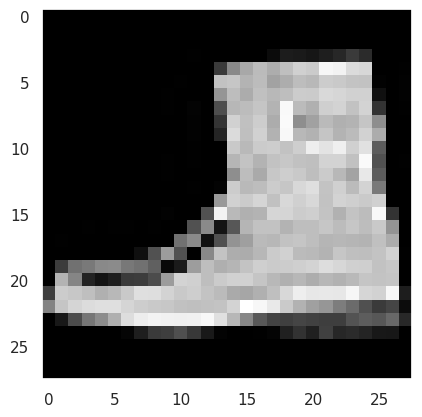



Label:      T-shirt/Top
Prediction: T-shirt/Top 



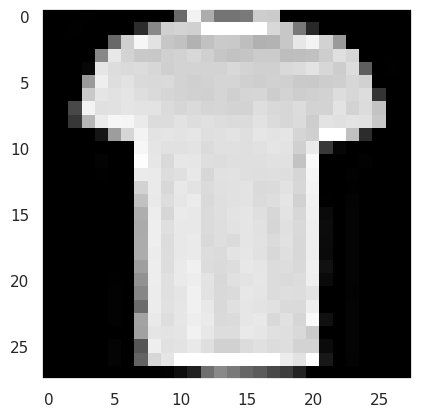



Label:      Shirt
Prediction: Shirt 



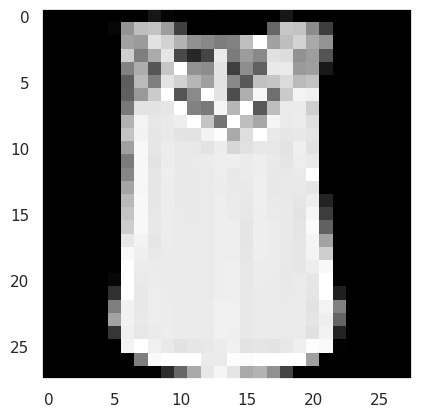



Label:      Ankle Boot
Prediction: Ankle Boot 



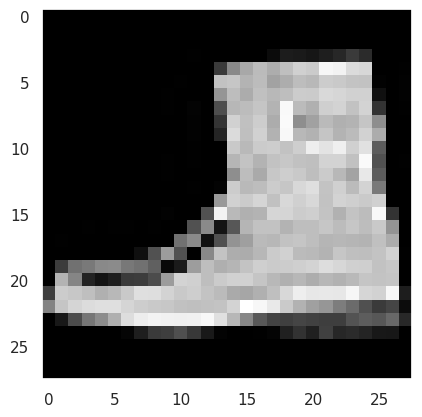

In [ ]:
# set number of predictions
num_predictions = 4

show_predictions(num_predictions, Y_test, predict_test)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)